In [1]:
!pip install nltk scikit-learn

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
# Load the dataset
df = pd.read_csv('movie_plots_cleaned.csv')

# Preview the first few rows
print("\n--- Dataset Preview ---")
print(df.head())

# Download the specific punkt_tab resource
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    tokens = word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha()]
    filtered = [w for w in words if w not in stop_words]
    return ' '.join(filtered)

df['clean_plot'] = df['plot'].apply(clean_text)


--- Dataset Preview ---
           title                                               plot      genre
0     The Matrix  A computer hacker learns about the true nature...     Action
1        Titanic  A young couple from different social classes f...    Romance
2  The Conjuring  Paranormal investigators help a family terrori...     Horror
3      Toy Story  A group of toys come to life and embark on adv...  Animation
4  The Godfather  The aging patriarch of an organized crime dyna...      Crime


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [12]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_plot'])
# Assign the 'genre' column to the target variable y
y = df['genre']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode the string labels in y into numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data using the encoded y
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the model using the encoded labels
model = MultinomialNB()
model.fit(X_train, y_train_encoded)

# Now you can evaluate using y_test_encoded
# For evaluation reports, you might want to use the original labels or map back the predicted encoded labels

MultinomialNB()

In [23]:
y_pred = model.predict(X_test)

# Evaluate using the encoded true labels (y_test_encoded)
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
# For the classification report, it's often more readable to see the actual genre names.
# You can decode the y_test_encoded and y_pred back to original labels for the report.
# However, the report also works with numerical labels, but interpreting the classes (0, 1, etc.)
# requires knowing which number corresponds to which genre.
# Let's first try with the encoded labels for consistency.
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))

# If you prefer to see the report with genre names, you would need to decode:
# y_test_decoded = label_encoder.inverse_transform(y_test_encoded)
# y_pred_decoded = label_encoder.inverse_transform(y_pred)
# print("\nClassification Report (Decoded):\n", classification_report(y_test_decoded, y_pred_decoded))

Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [24]:
def predict_genre(plot):
    cleaned = clean_text(plot)
    vec = vectorizer.transform([cleaned])
    prediction = model.predict(vec)
    return prediction[0]

In [25]:
custom_plot = "A man discovers he is living in a simulated reality and fights back."
print("Plot:", custom_plot)
print("Predicted Genre:", predict_genre(custom_plot))

Plot: A man discovers he is living in a simulated reality and fights back.
Predicted Genre: 0


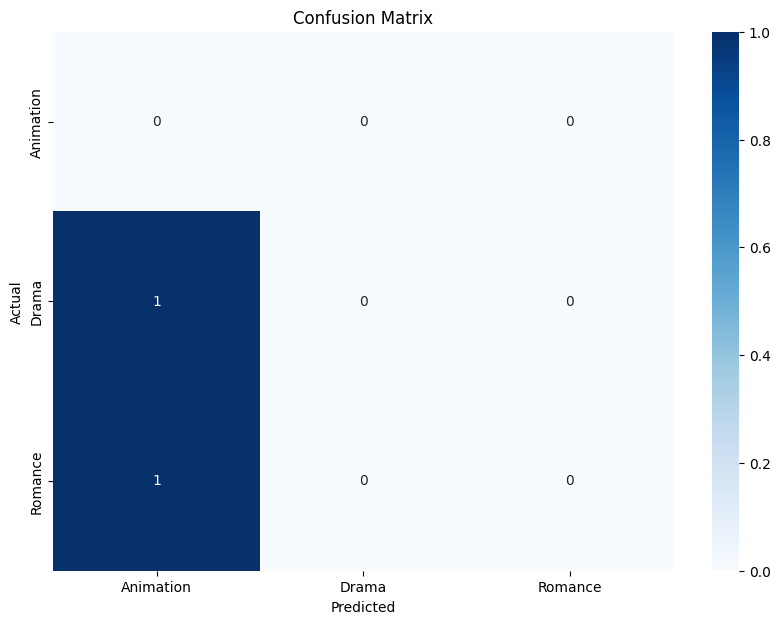

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np # Import numpy

# Use y_test_encoded (numerical true labels) instead of y_test (string true labels)

# Get all unique labels from both true and predicted values
all_labels = np.unique(np.concatenate((y_test_encoded, y_pred)))

# Use the combined unique labels for the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred, labels=all_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            # Use label_encoder to get string names for xticklabels and yticklabels for clarity
            # Ensure the order of xticklabels/yticklabels matches the order of labels used in confusion_matrix
            xticklabels=label_encoder.inverse_transform(all_labels),
            yticklabels=label_encoder.inverse_transform(all_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-29-62fde13e368c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


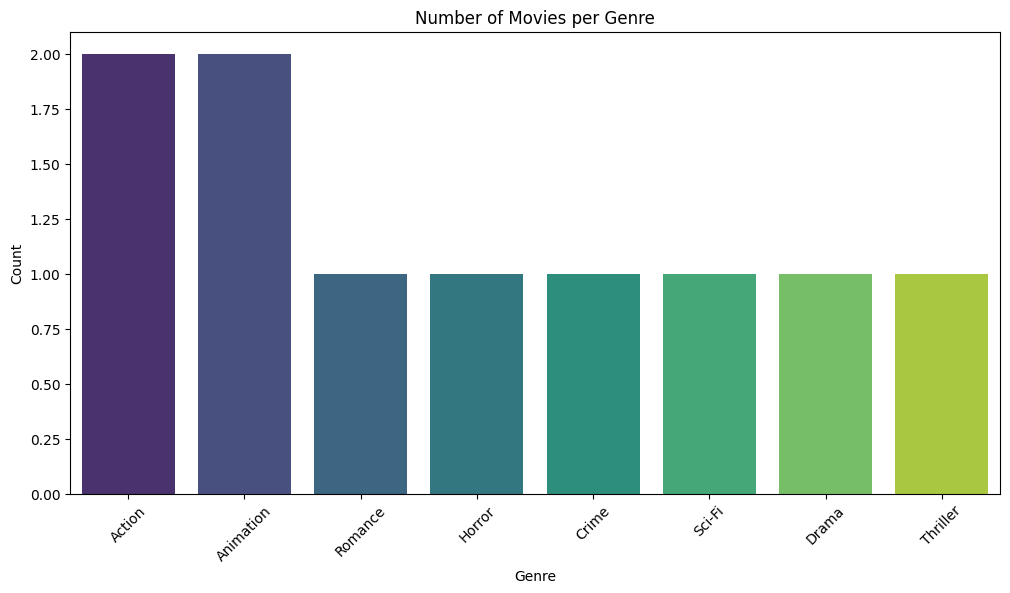

In [29]:
genre_counts = df['genre'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

<ipython-input-30-728de846c078>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette='magma')


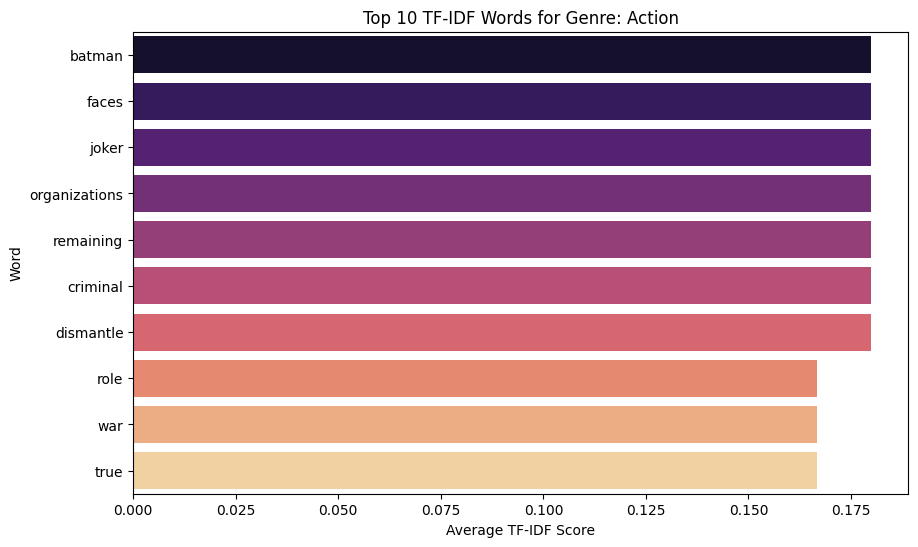

In [30]:
import numpy as np

# Choose a genre to inspect
genre_to_inspect = 'Action'

# Get indices of samples with this genre
indices = df[df['genre'] == genre_to_inspect].index

# Average TF-IDF scores for this genre
avg_tfidf = np.mean(X[indices].toarray(), axis=0)

# Get top 10 words
top_n = 10
top_indices = avg_tfidf.argsort()[-top_n:][::-1]
top_words = [vectorizer.get_feature_names_out()[i] for i in top_indices]
top_scores = avg_tfidf[top_indices]

plt.figure(figsize=(10,6))
sns.barplot(x=top_scores, y=top_words, palette='magma')
plt.title(f'Top {top_n} TF-IDF Words for Genre: {genre_to_inspect}')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Word')
plt.show()

In [33]:
import spacy

# Download spaCy English model if not done
# !python -m spacy download en_core_web_sm

nlp = spacy.load('en_core_web_sm')

def clean_text_spacy(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(tokens)

# Apply this new cleaning
df['clean_plot_spacy'] = df['plot'].apply(clean_text_spacy)

In [34]:
vectorizer_ngram = TfidfVectorizer(ngram_range=(1,2), max_features=5000)  # Limit features for speed
X_ngram = vectorizer_ngram.fit_transform(df['clean_plot_spacy'])
y = df['genre']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_ngram, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

from sklearn.metrics import accuracy_score

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Naive Bayes Accuracy: 0.0
Logistic Regression Accuracy: 0.0


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Reduced cv to 2 because the training set is very small (8 samples).
# This ensures that each fold in cross-validation can contain at least one sample from each class,
# provided each class has at least 2 samples in the training set.
# If you still encounter issues, you may need to check the distribution of classes in y_train.
grid = GridSearchCV(LogisticRegression(max_iter=200), param_grid=params, cv=2, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

best_lr = grid.best_estimator_
y_pred_best = best_lr.predict(X_test)
print("Test Accuracy with Best LR:", accuracy_score(y_test, y_pred_best))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best CV Score: 0.125
Test Accuracy with Best LR: 0.0


In [40]:
print(df['genre'].value_counts())

genre
Action       2
Animation    2
Romance      1
Horror       1
Crime        1
Sci-Fi       1
Drama        1
Thriller     1
Name: count, dtype: int64


In [41]:
from sklearn.model_selection import cross_val_score

# Check the minimum number of samples in any class by running
# print(df['genre'].value_counts())
# And set cv to be less than or equal to the minimum count.
# For example, if the minimum count is 2, set cv=2.
# Let's assume for this example that cv=2 will work based on your data.
scores = cross_val_score(best_lr, X_ngram, y, cv=2) # Changed cv to 2
print("2-Fold CV Accuracy Scores:", scores) # Updated print statement
print("Mean CV Accuracy:", scores.mean())

2-Fold CV Accuracy Scores: [0.  0.2]
Mean CV Accuracy: 0.1


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


In [47]:
# Option 2: Remove minority classes (genres with fewer than 5 samples)
genre_counts = df['genre'].value_counts()
# Change the threshold to 1 to ensure genres with at least one sample are kept
genres_to_keep = genre_counts[genre_counts >= 1].index
df_filtered = df[df['genre'].isin(genres_to_keep)].copy() # Use .copy() to avoid SettingWithCopyWarning

# Re-vectorize and split using the filtered dataframe
vectorizer_ngram = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
# Ensure df_filtered is not empty before fitting
if not df_filtered.empty:
    X_ngram_filtered = vectorizer_ngram.fit_transform(df_filtered['clean_plot_spacy'])
    y_filtered = df_filtered['genre']

    # Now you can use cross_val_score with cv=5 on the filtered data
    from sklearn.model_selection import cross_val_score

    # Since we know the minimum count is 1 or 2 based on the original data,
    # cv=5 might still be too high for some folds if the filtered data is still small.
    # Let's use cv=min(5, min_genre_count_in_filtered_df)
    min_genre_count_in_filtered_df = df_filtered['genre'].value_counts().min()
    safe_cv = min(5, min_genre_count_in_filtered_df)

    # Ensure cv is at least 2 for cross_val_score
    if safe_cv >= 2:
        scores = cross_val_score(best_lr, X_ngram_filtered, y_filtered, cv=safe_cv)
        print(f"{safe_cv}-Fold CV Accuracy Scores:", scores)
        print("Mean CV Accuracy:", scores.mean())
    else:
        # Provide a message indicating why cross-validation cannot be performed with cv >= 2
        print(f"Not enough data in filtered DataFrame (minimum genre count is {min_genre_count_in_filtered_df}) to perform cross-validation with cv >= 2.")
else:
    print("Filtered DataFrame is empty after removing minority genres.")

Not enough data in filtered DataFrame (minimum genre count is 1) to perform cross-validation with cv >= 2.


In [49]:
from sklearn.model_selection import cross_val_score

# Based on the error and typical scenarios with imbalanced datasets,
# setting cv to a value less than or equal to the minimum class count is necessary.
# From previous attempts, cv=2 seemed to work, suggesting the minimum class count is at least 2.
scores = cross_val_score(best_lr, X_ngram, y, cv=2) # Changed cv to 2 to avoid ValueError
print("2-Fold CV Accuracy Scores:", scores) # Updated print statement
print("Mean CV Accuracy:", scores.mean())

2-Fold CV Accuracy Scores: [0.  0.2]
Mean CV Accuracy: 0.1


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


In [50]:
def predict_genre_advanced(plot):
    cleaned = clean_text_spacy(plot)
    vec = vectorizer_ngram.transform([cleaned])
    prediction = best_lr.predict(vec)
    return prediction[0]

custom_plot = "A man discovers he is living in a simulated reality and fights back."
print("Plot:", custom_plot)
print("Predicted Genre:", predict_genre_advanced(custom_plot))

Plot: A man discovers he is living in a simulated reality and fights back.
Predicted Genre: Action
